In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array, save_img, array_to_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Define the list of augmentation techniques
augmentations = [
    'original', 
    'flip_horizontal', 
    'flip_vertical', 
    'rotate', 
    'zoom_range',
    'shear_range',
    'width_shift',
    'height_shift',
    'brightness_jitter',
    'saturation_jitter',
    'hue_jitter', 
    'contrast_jitter'    
]


#Data generators
original_datagen = ImageDataGenerator()
rotation_datagen = ImageDataGenerator(rotation_range=45, fill_mode = 'constant')
horizontal_datagen = ImageDataGenerator(horizontal_flip=True)
vertical_datagen = ImageDataGenerator(vertical_flip=True)
zoom_datagen = ImageDataGenerator(zoom_range=[0.8, 1.25], fill_mode = 'constant')
shear_datagen = ImageDataGenerator(shear_range=45, fill_mode = 'constant')
height_datagen = ImageDataGenerator(height_shift_range=0.3, fill_mode = 'constant')
width_datagen = ImageDataGenerator(width_shift_range=0.3, fill_mode = 'constant')
brightness_datagen = ImageDataGenerator(brightness_range=[0.1, 2], fill_mode = 'constant')

data_generators = [
    original_datagen,
    horizontal_datagen,
    vertical_datagen,
    rotation_datagen,
    zoom_datagen, 
    shear_datagen, 
    height_datagen,
    width_datagen,
    brightness_datagen,     
]

# Not supported augmentations by ImageDataGenerator
def saturation_jitter(img):
    image_array = img_to_array(img)

    image_array_jittered = tf.image.random_saturation(image_array, 0.2, 3)

    jittered_image = array_to_img(image_array_jittered)
    
    return jittered_image

def hue_jitter(img):
    image_array = img_to_array(img)

    image_array_jittered = tf.image.random_hue(image_array, 0.5)

    jittered_image = array_to_img(image_array_jittered)
    
    return jittered_image


def contrast_jitter(img):
    image_array = img_to_array(img)

    image_array_jittered = tf.image.random_contrast(image_array, 0.5, 2)

    jittered_image = array_to_img(image_array_jittered)
    
    return jittered_image

def vertical_flip(img):
    image_array = img_to_array(img)

    image_array_flipped = tf.image.flip_up_down(image_array)

    image_flipped = array_to_img(image_array_flipped)
    
    return image_flipped

def horizontal_flip(img):
    image_array = img_to_array(img)

    image_array_flipped = tf.image.flip_left_right(image_array)

    img_flipped = array_to_img(image_array_flipped)
    
    return img_flipped


# Define with augmentation function
def augment_with_datagenerator(technique, img):
    index = augmentations.index(technique)
    datagen = data_generators[index]
    # Reshape the image to 4D array
    data = img_to_array(img)
    sample = np.expand_dims(data, 0)
    aug_iter = datagen.flow(sample, batch_size=1)
    
    batch = aug_iter.next()
    image = batch[0].astype('uint8')
    return image
    

# Define the augmentation function
def augment_image(technique, img):    
    if (technique == 'saturation_jitter'):
        augmented_img = saturation_jitter(img)
    elif (technique == 'hue_jitter'):
        augmented_img = hue_jitter(img)
    elif (technique == 'contrast_jitter'):
        augmented_img = contrast_jitter(img)
    elif (technique == 'flip_vertical'):
        augmented_img = vertical_flip(img)
    elif (technique == 'flip_horizontal'):
        augmented_img = horizontal_flip(img)
    else:
        augmented_img = augment_with_datagenerator(technique, img)
    return augmented_img





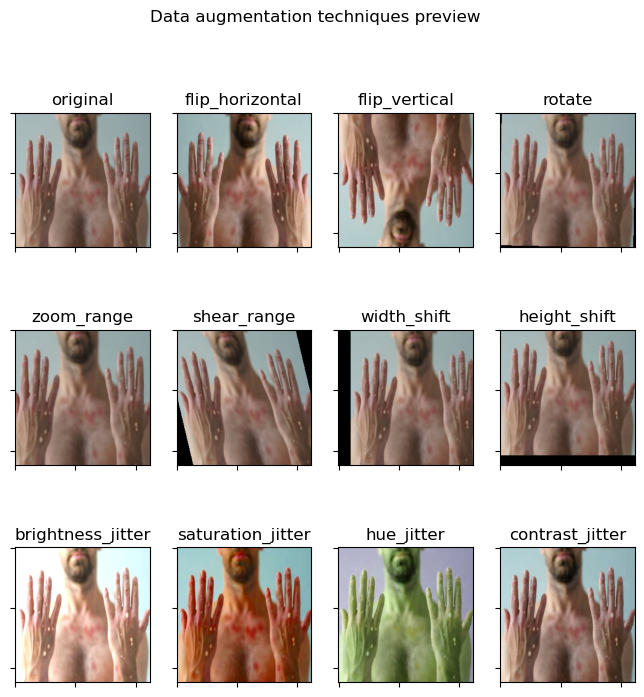

In [24]:
# Load and preprocess a sample image from the chickenpox category
img_path = 'data/MSID/Monkeypox/monkeypox69.png'
img = load_img(img_path,  target_size=(224, 224))

# Create a 3x3 grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(8, 8))


# Plot each image in a subplot using a loop
for i, ax in enumerate(axs.flat):    
    augmented_image = augment_image(augmentations[i], img)
    
    # Plot the image in the current subplot
    ax.imshow(augmented_image)
    
    # Remove the tick labels from the current subplot
    ax.set_facecolor('white')
    ax.tick_params(colors='black')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    # Add a title to the current subplot
    ax.set_title(augmentations[i])
    
# Add a title to the figure
fig.suptitle('Data augmentation techniques preview')

# Show the plot
plt.show()
    

In [6]:
data_dir='data/MSID_US'
save_dir='data/MSID_US_AUG'

# Loop over the images in the original dataset
for subdir, dirs, files in os.walk(data_dir):
    for file in files:
        
        # Load the image
        filename = os.path.join(subdir, file)
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            img = load_img(filename)
            # Apply the augmentations
            for aug in augmentations:
                # Apply the augmentation function
                augmented_img = augment_image(aug, img)
    
                # Get the class name from the directory name
                class_name = os.path.basename(subdir)
    
                # Create the save directory if it doesn't exist
                save_subdir = os.path.join(save_dir, class_name)
                os.makedirs(save_subdir, exist_ok=True)
    
                # Define the filename for the augmented image
                filename = os.path.splitext(file)[0] + '_' + aug + '.jpg'
    
                # Save the augmented image
                save_path = os.path.join(save_subdir, filename)
                save_img(save_path, augmented_img)